In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [17]:
def simulate_rw(T, random_state, plot = True):
    y = np.zeros(T)
    y[0] = 0
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    for t in range(1, T):
        y[t] = y[t-1] + epsilons[t]
    if plot:
        fig = plt.figure(figsize = (8,4.5))
        plt.plot(y)
        plt.xlabel('Период')
        plt.ylabel('Значение')
        plt.title(r'Cимуляция процесса случайного блуждания')
        plt.show()
    else:
        return y
    
def plot_acf_pacf(y, model_name):
    fig, ax = plt.subplots(1,2, figsize = (8, 4.5))
    plt.suptitle('Эмпирические АКФ и ЧАКФ для модели %s' %model_name)
    sm.graphics.tsa.plot_acf(y, ax = ax[0])
    ax[0].set_xlabel('Лаг')
    ax[0].set_ylabel('Автокорреляция')
    sm.graphics.tsa.plot_pacf(y, ax = ax[1])
    ax[1].set_xlabel('Лаг')
    ax[1].set_ylabel('Частичная автокорреляция')
    plt.tight_layout()
    plt.show()
    
def simulate_ar1(phi_0, phi_1, T, random_state, plot = True):
    y = np.zeros(T)
    if phi_1 == 1:
        y[0] = stats.norm.rvs(1)
    else:
        y[0] = phi_0 / (1-phi_1)
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    for t in range(1, T):
        y[t] = phi_0 + phi_1*y[t-1] + epsilons[t]
    if plot:
        fig = plt.figure(figsize = (8,4.5))
        plt.plot(y)
        plt.xlabel('Период')
        plt.ylabel('Значение')
        plt.title(r'Cимуляция процесса $Y_t = %.2f + %.2f Y_{t-1} + \varepsilon_t$' %(phi_0, phi_1))
        plt.show()
    else:
        return y

In [18]:
y_rw = simulate_rw(T = 500, random_state = 12, plot = False)

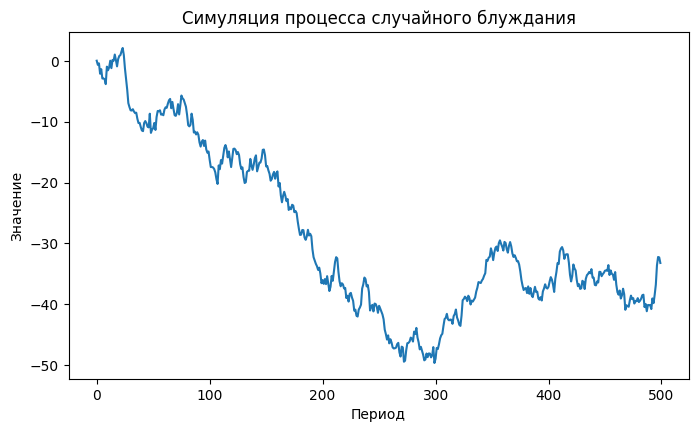

In [19]:
simulate_rw(T = 500, random_state = 12, plot = True)

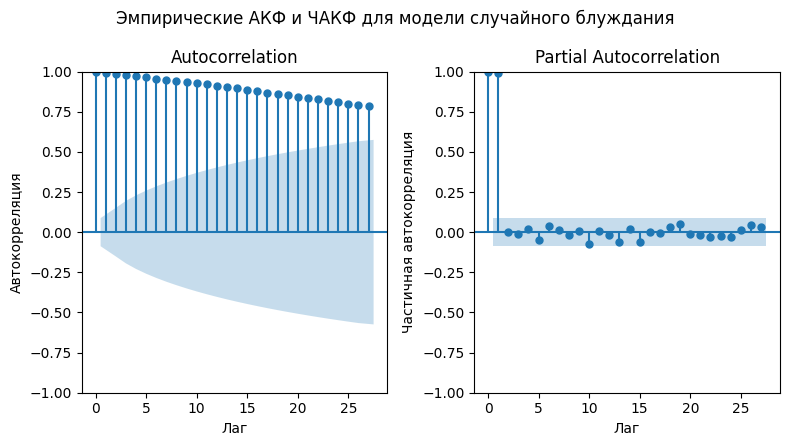

In [13]:
plot_acf_pacf(y_rw, 'случайного блуждания')

In [14]:
evaluation = pd.DataFrame(columns = ['lagAR', 'lagMA', 'aic', 'bic'])
row = 0
for i in range(0,5):
    for j in range(0,5):
        results = sm.tsa.arima.ARIMA(y_rw, order=(i, 0, j)).fit()
        evaluation.loc[row, ['lagAR', 'lagMA', 'aic', 'bic']] = [i, j, results.aic, results.bic]
        row += 1

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autore

In [15]:
evaluation.sort_values(by = 'bic').head()

,lagAR,lagMA,aic,bic
5,1,0,1438.839242,1451.483066
10,2,0,1440.224372,1457.082804
6,1,1,1440.240461,1457.098894
15,3,0,1442.131743,1463.204784
7,1,2,1442.162661,1463.235702


In [98]:
results = sm.tsa.arima.ARIMA(y_rw, order=(1, 0, 0)).fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -716.420
Date:                Tue, 03 Dec 2024   AIC                           1438.839
Time:                        21:44:05   BIC                           1451.483
Sample:                             0   HQIC                          1443.801
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.4698     11.846     -1.728      0.084     -43.689       2.749
ar.L1          0.9981      0.003    374.669      0.000       0.993       1.003
sigma2         1.0167      0.063     16.190      0.0

In [21]:
y_ar = simulate_ar1(phi_0 = 0, phi_1 = 0.99, T = 500, random_state = 12, plot = False)

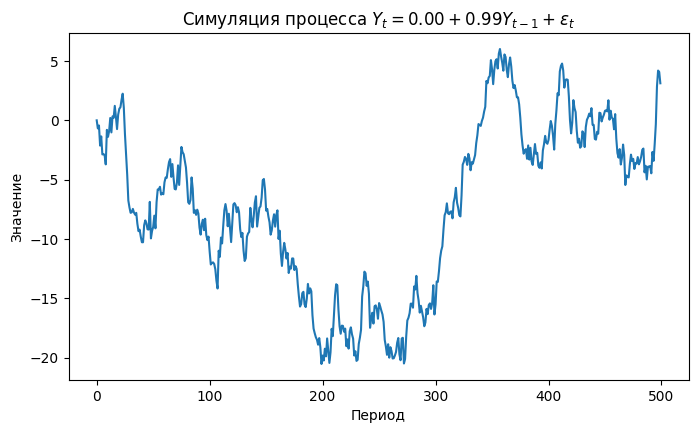

In [22]:
simulate_ar1(phi_0 = 0, phi_1 = 0.99, T = 500, random_state = 12, plot = True)

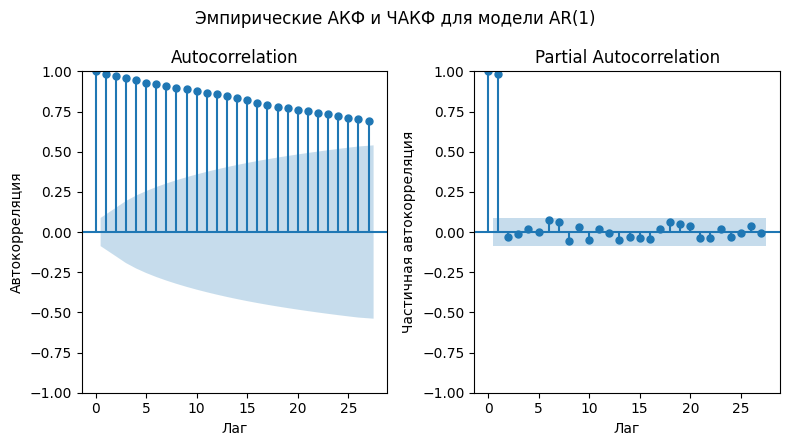

In [23]:
plot_acf_pacf(y_ar, 'AR(1)')

In [24]:
evaluation = pd.DataFrame(columns = ['lagAR', 'lagMA', 'aic', 'bic'])
row = 0
for i in range(0,5):
    for j in range(0,5):
        results = sm.tsa.arima.ARIMA(y_ar, order=(i, 0, j)).fit()
        evaluation.loc[row, ['lagAR', 'lagMA', 'aic', 'bic']] = [i, j, results.aic, results.bic]
        row += 1

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autore

In [25]:
evaluation.sort_values(by = 'bic').head()

,lagAR,lagMA,aic,bic
5,1,0,1435.02612,1447.669945
10,2,0,1436.610128,1453.46856
6,1,1,1436.614035,1453.472467
11,2,1,1438.410269,1459.483309
15,3,0,1438.575441,1459.648481


In [26]:
results = sm.tsa.arima.ARIMA(y_ar, order=(1, 0, 0)).fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -714.513
Date:                Wed, 04 Dec 2024   AIC                           1435.026
Time:                        23:38:47   BIC                           1447.670
Sample:                             0   HQIC                          1439.988
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6515      4.849     -0.959      0.337     -14.156       4.853
ar.L1          0.9905      0.007    149.767      0.000       0.978       1.003
sigma2         1.0123      0.062     16.258      0.0

In [27]:
adftest = adfuller(y_rw, maxlag = 10, regression = 'c')

dfoutput = pd.Series(
        adftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ]
)

dfoutput

Test Statistic                  -2.140550
p-value                          0.228525
#Lags Used                       0.000000
Number of Observations Used    499.000000
dtype: float64

In [28]:
adftest = adfuller(y_ar, maxlag = 10, regression = 'c')

dfoutput = pd.Series(
        adftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ]
)

dfoutput

Test Statistic                  -1.433075
p-value                          0.566321
#Lags Used                       0.000000
Number of Observations Used    499.000000
dtype: float64

In [30]:
sber = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_sber.csv', index_col = 0)
sber['TRADEDATE'] = pd.to_datetime(sber['TRADEDATE'])
sber = sber.set_index('TRADEDATE', drop = True)
sber.head()

,CLOSE
TRADEDATE,
2013-03-25,98.79
2013-03-26,97.20
2013-03-27,96.75
2013-03-28,98.59
2013-03-29,98.76


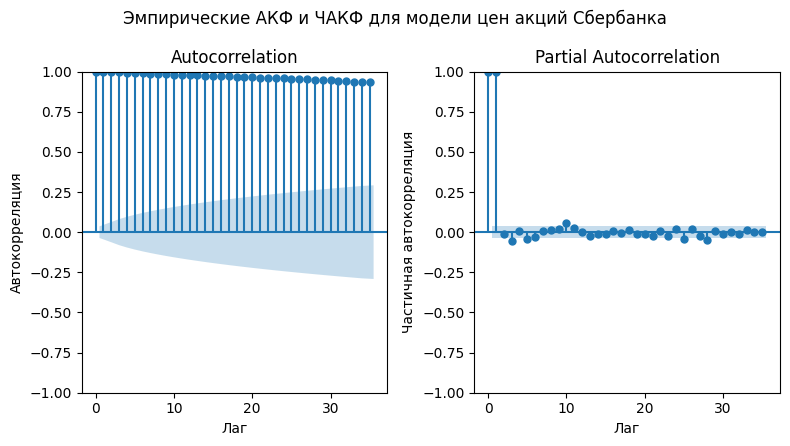

In [31]:
plot_acf_pacf(sber.dropna(), 'цен акций Сбербанка')

In [32]:
adftest = adfuller(sber.dropna(), maxlag = 10, regression = 'c')

dfoutput = pd.Series(
        adftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ]
)

dfoutput

Test Statistic                   -1.520766
p-value                           0.523215
#Lags Used                       10.000000
Number of Observations Used    2915.000000
dtype: float64

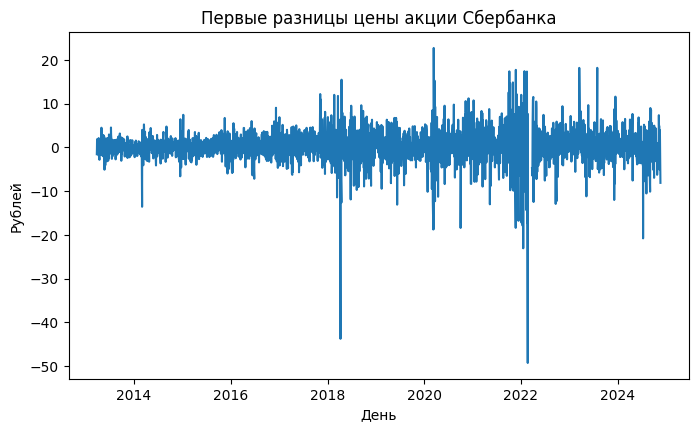

In [33]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(sber['CLOSE'].diff())
plt.xlabel('День')
plt.ylabel('Рублей')
plt.title('Первые разницы цены акции Сбербанка')
plt.show()

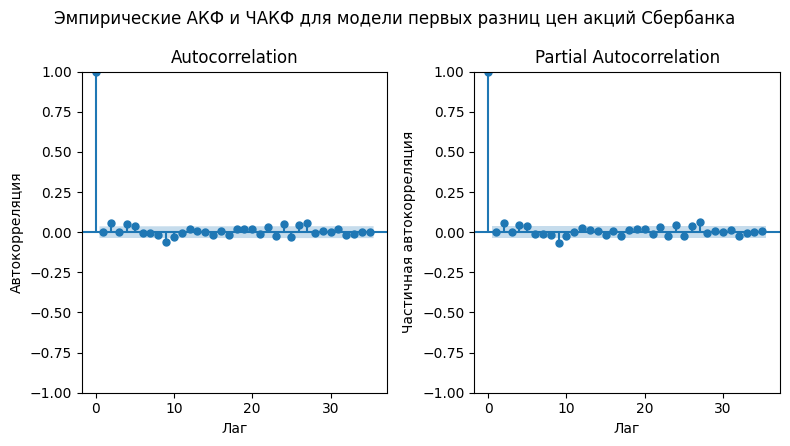

In [34]:
plot_acf_pacf(sber.dropna().diff().dropna(), 'первых разниц цен акций Сбербанка')

In [35]:
adftest = adfuller(sber.dropna().diff().dropna(), maxlag = 10, regression = 'c')

dfoutput = pd.Series(
        adftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ]
)

dfoutput

Test Statistic                -1.813730e+01
p-value                        2.496450e-30
#Lags Used                     9.000000e+00
Number of Observations Used    2.915000e+03
dtype: float64